Este es un ejercicio que elegí en Kaggle para analizar los diferentes cereales que se ofrecen en el mercado y cómo estos, pese a que venden salud y que los cereales son buenos, no todas las marcas lo son y hay algunos muy nocivos para la salud.
mas info en: https://www.kaggle.com/datasets/crawford/80-cereals?resource=download

About Dataset

Context

If you like to eat cereal, do yourself a favor and avoid this dataset at all costs. After seeing these data it will never be the same for me to eat Fruity Pebbles again.

Content

Fields in the dataset:

Name: Name of cereal
mfr: Manufacturer of cereal
A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina

type:

cold

hot

calories: calories per serving
protein: grams of protein
fat: grams of fat
sodium: milligrams of sodium
fiber: grams of dietary fiber
carbo: grams of complex carbohydrates
sugars: grams of sugars
potass: milligrams of potassium
vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
shelf: display shelf (1, 2, or 3, counting from the floor)
weight: weight in ounces of one serving
cups: number of cups in one serving
rating: a rating of the cereals (Possibly from Consumer Reports?)
Acknowledgements
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found here

This dataset has been converted to CSV

Inspiration
Eat too much sugary cereal? Ruin your appetite with this dataset!

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = '/content/drive/MyDrive/Coding Dojo/Semana 3/cereal.csv'
df = pd.read_csv(filename)
df.head()



,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


(77, 16)

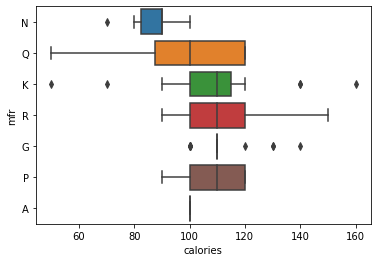

In [4]:
#Este grafico es interesante para ver como las diferentes marcas se enfocan en
#la salud,  o no les interesa. Claramente la marca N: Nabisco, se diferencia del resto con
#productos más saludables
sns.boxplot(x="calories", y="mfr", data=df)

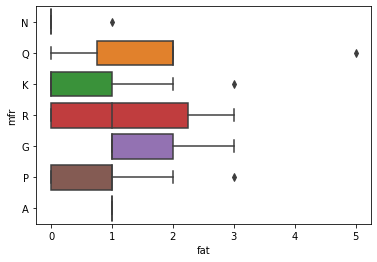

In [5]:
sns.boxplot(x="fat", y="mfr", data=df)

siguiendo acorde a lo anterior, la marca nabisco practicamente tiene 0 grasa, con solo outliers y el resto en cero, corroboraremos eso con un conteo de valores

In [8]:
df.loc[df['mfr'] == "N", ['fat']].value_counts()

fat
0      5
1      1
dtype: int64

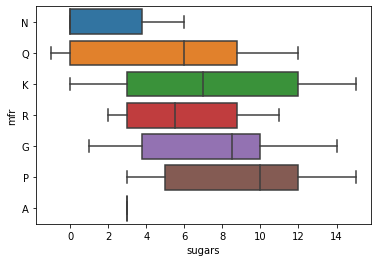

In [10]:
#solo uno de los cereales marca nabisco tiene 1 de grasa. Finalmente el azucar y carbo

sns.boxplot(x="sugars", y="mfr", data=df)



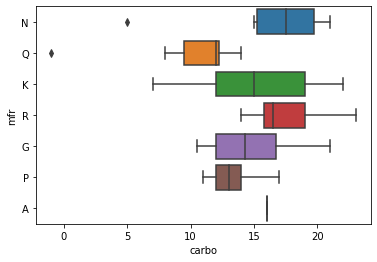

In [11]:
#solo en carbohidratos la marca quaker tiene un producto con menor valor y que
#marca una diferencia, en este dato nabisco pasa a ser como todas las marcas.
sns.boxplot(x="carbo", y="mfr", data=df)

In [15]:
#veamos cual es ese producto

df.loc[df['mfr'] == "Q"]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851
35,Honey Graham Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.0,1.00,21.871292
41,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.0,0.67,45.328074
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.5,1.00,60.756112
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645
56,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6,110,25,3,1.0,0.50,49.511874
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [19]:
#Al revisar esto, nos damos cuenta que quaker oatmeal tiene un valor extraño, ¿cómo va a tener azucar y carbo negativos?
#despues de un chequeo en internet del producto, cambiamos esos valores a los reales

df.loc[df['name'] == 'Quaker Oatmeal', 'sugars'] = 1
df["sugars"].value_counts()

3     13
6      7
0      7
12     7
8      5
5      5
10     5
11     5
9      4
7      4
13     4
14     3
2      3
1      2
15     2
4      1
Name: sugars, dtype: int64

In [21]:
#solo para chequear que la imputacion fue correcta:
df.loc[df['name'] == 'Quaker Oatmeal', 'sugars']
#ahora lo mismo para cambiar el valor carbo por 27 gr segun su tabla nutricional

57    1
Name: sugars, dtype: int64

In [23]:
df.loc[df['name'] == 'Quaker Oatmeal', 'carbo']=27

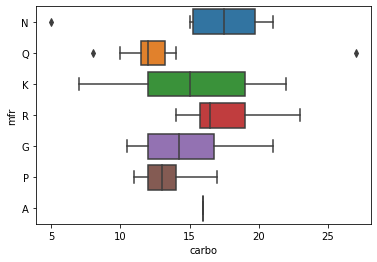

In [24]:
#nuevamente graficamos carbo para mostrar correctamente los valores

sns.boxplot(x="carbo", y="mfr", data=df)

In [ ]:
#Finalmente, y como este desarrollo no pretende ir muy en profundidad sino como 
#ejercicio de visualizacion, veremos una representacion general de los datos

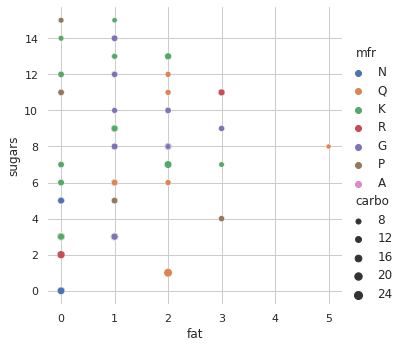

In [28]:
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="fat", y="sugars",
    hue="mfr", size="carbo",
    
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)